In [1]:
import mailbox as mb
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime
%matplotlib inline

In [2]:
family='Myraid Pro'
title_font=fm.FontProperties(family=family,style='normal',size=20,weight='normal',
                             stretch='normal')
label_font=fm.FontProperties(family=family,style='normal',size=16,weight='normal',
                             stretch='normal')
ticks_font=fm.FontProperties(family=family,style='normal',size=12,weight='normal',
                             stretch='normal')


## Load The Gmail Archieve And Parsedates/times From Messages

In [3]:
path='mail.mbox'
mbox=mb.mbox(path)
print('There are {:,} messages in the archieve.'.format(len(mbox)))

There are 4,502 messages in the archieve.


In [4]:
all_dates=[]
all_times=[]
for message in mbox:
    if not 'X-Gmail-Labels'in message or ('X-Gmail-Labels'in message and not 'chat' in message['X-Gmail-Labels']):
        if 'Date' in message and message['Date'] is not None:
            try:
                date,time=str(parse_datetime(message['Date'])).split(' ')
            except Exception as e:
                print(e,message['Date'])
            all_dates.append(date)
            all_times.append(time)
        else:
            pass
print('There are {:,} messages with dates.'.format(len(all_dates)))

There are 3,971 messages with dates.


In [5]:
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(date_counts)))
date_counts

There are 702 dates with messages.


2017-10-31     1
2017-11-01     1
2017-11-09     1
2017-11-23     1
2017-11-26     2
2017-11-29     1
2017-12-01     5
2017-12-02     2
2017-12-03     1
2017-12-05     1
2017-12-06     1
2017-12-07     1
2017-12-08     1
2017-12-09     1
2017-12-12     1
2017-12-13     1
2017-12-14     1
2017-12-15     1
2017-12-16     1
2017-12-17     1
2017-12-18     1
2017-12-19     1
2017-12-20     1
2017-12-21     1
2017-12-22     1
2017-12-23     1
2017-12-24     1
2017-12-25     1
2017-12-27     1
2017-12-28     1
              ..
2020-01-08    13
2020-01-09    25
2020-01-10    22
2020-01-11    21
2020-01-12    17
2020-01-13    19
2020-01-14    21
2020-01-15    19
2020-01-16    23
2020-01-17    22
2020-01-18    22
2020-01-19    19
2020-01-20    23
2020-01-21    21
2020-01-22    25
2020-01-23    29
2020-01-24    37
2020-01-25    30
2020-01-26    28
2020-01-27    51
2020-01-28    38
2020-01-29    41
2020-01-30    42
2020-01-31    41
2020-02-01    40
2020-02-02    35
2020-02-03    42
2020-02-04    

In [6]:
date_range=pd.date_range(start=min(all_dates),end=max(all_dates),freq='D')
index=date_range.map(lambda x: str(x.date()))
date_counts=date_counts.reindex(index,fill_value=0)
print('There are {:,} dates totalin the range, with or without messages.'.format(len(date_counts)))
date_counts

There are 829 dates totalin the range, with or without messages.


2017-10-31     1
2017-11-01     1
2017-11-02     0
2017-11-03     0
2017-11-04     0
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08     0
2017-11-09     1
2017-11-10     0
2017-11-11     0
2017-11-12     0
2017-11-13     0
2017-11-14     0
2017-11-15     0
2017-11-16     0
2017-11-17     0
2017-11-18     0
2017-11-19     0
2017-11-20     0
2017-11-21     0
2017-11-22     0
2017-11-23     1
2017-11-24     0
2017-11-25     0
2017-11-26     2
2017-11-27     0
2017-11-28     0
2017-11-29     1
              ..
2020-01-08    13
2020-01-09    25
2020-01-10    22
2020-01-11    21
2020-01-12    17
2020-01-13    19
2020-01-14    21
2020-01-15    19
2020-01-16    23
2020-01-17    22
2020-01-18    22
2020-01-19    19
2020-01-20    23
2020-01-21    21
2020-01-22    25
2020-01-23    29
2020-01-24    37
2020-01-25    30
2020-01-26    28
2020-01-27    51
2020-01-28    38
2020-01-29    41
2020-01-30    42
2020-01-31    41
2020-02-01    40
2020-02-02    35
2020-02-03    42
2020-02-04    

In [7]:
xlabels=pd.Series([label if '01-01'in label else None for label in date_counts.index])
xlabels=xlabels[pd.notnull(xlabels)]
xlabels

62     2018-01-01
427    2019-01-01
792    2020-01-01
dtype: object

C:\Users\apssdc\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Myraid Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


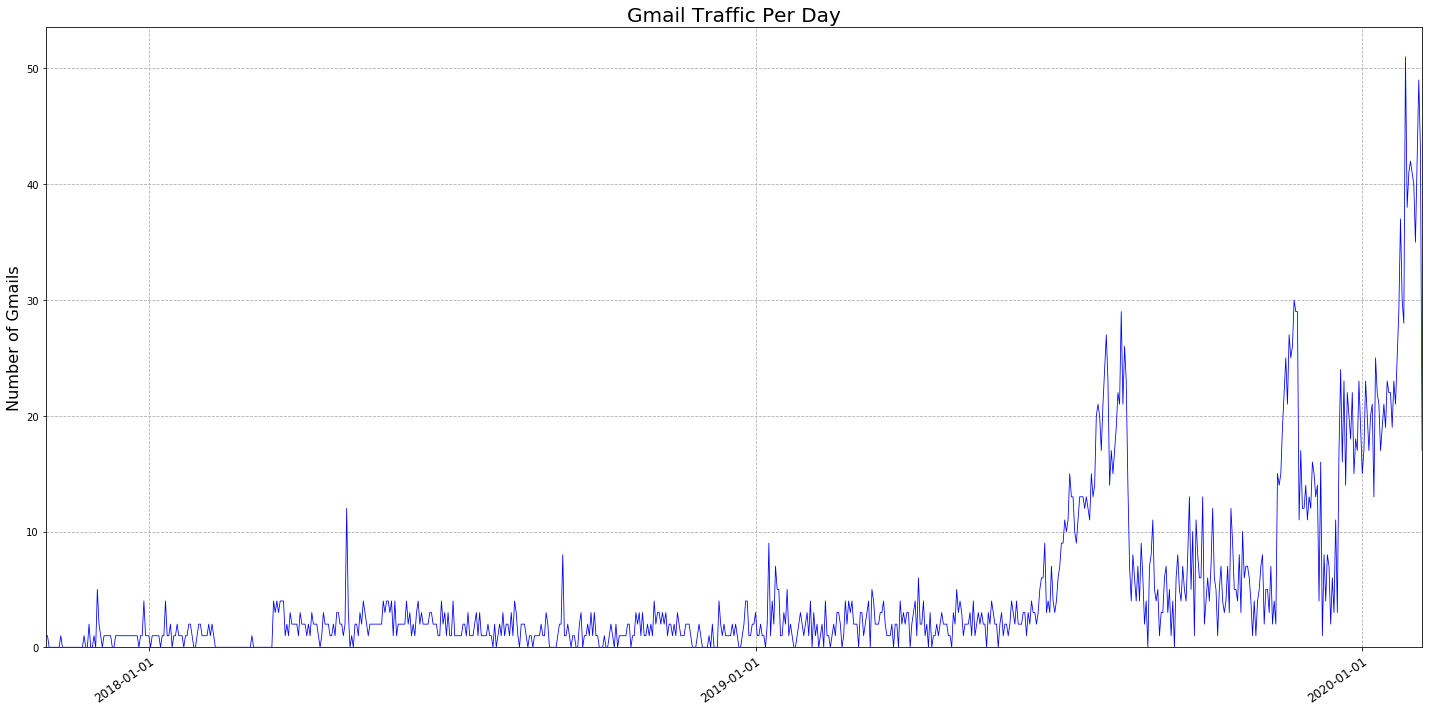

In [8]:
fig=plt.figure(figsize=[20,10])
ax=date_counts.plot(kind='line',linewidth=0.8,alpha=1,color='b')
ax.set_ylim(bottom=0)
ax.grid(True,linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels,rotation=35,rotation_mode='anchor',ha='right',
                   fontproperties=ticks_font)
ax.set_ylabel('Number of Gmails',fontproperties=label_font)
ax.set_title('Gmail Traffic Per Day',fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-Traffic-day.png',dpi=96)
plt.show()

In [12]:
all_months=[x[:-3] for x in all_dates]
month_counts= pd.Series(all_months).value_counts().sort_index()
month_counts

2017-10      1
2017-11      6
2017-12     35
2018-01     33
2018-02     12
2018-03     42
2018-04     64
2018-05     70
2018-06     68
2018-07     44
2018-08     44
2018-09     39
2018-10     38
2018-11     50
2018-12     39
2019-01     71
2019-02     53
2019-03     67
2019-04     59
2019-05     71
2019-06    101
2019-07    417
2019-08    362
2019-09    165
2019-10    169
2019-11    432
2019-12    411
2020-01    782
2020-02    226
dtype: int64